In [2]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

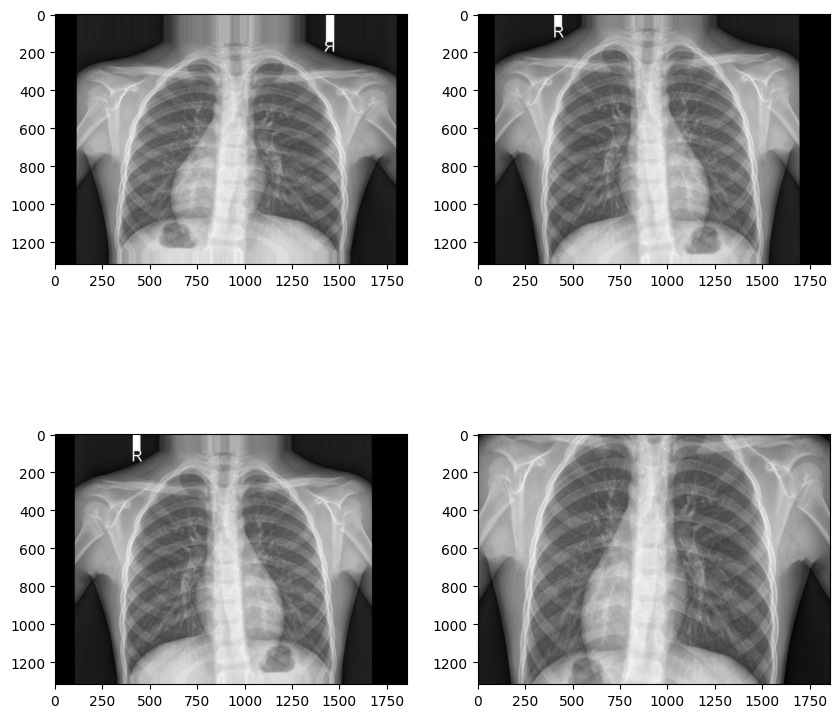

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar uma imagem de exemplo
img = load_img('/content/drive/MyDrive/CNN_COVID/dados_fonte/chest_xray/test/NORMAL/IM-0001-0001.jpeg')  # substitua pelo caminho da sua imagem
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Configurar o plot
fig = plt.figure(figsize=(10,10))

# Gerar imagens transformadas
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    plt.grid(False)
    plt.imshow(array_to_img(batch[0]))

    if i == 3:  # Vamos gerar apenas 4 imagens para visualização
        break
    i += 1

plt.show()

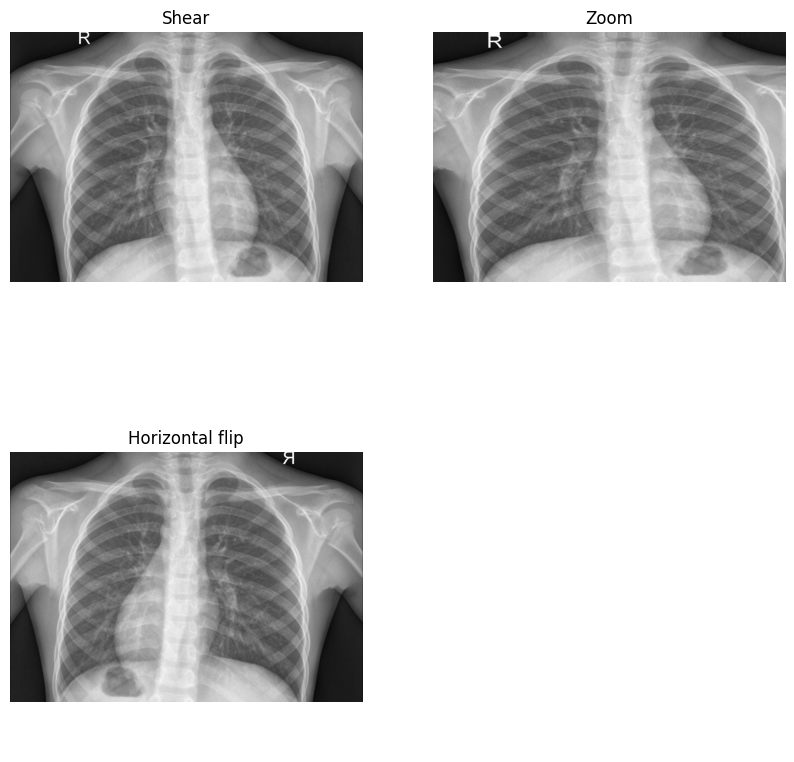

In [10]:
import numpy as np

# Carregar uma imagem de exemplo
img = load_img('/content/drive/MyDrive/CNN_COVID/dados_fonte/chest_xray/test/NORMAL/IM-0001-0001.jpeg')  # substitua pelo caminho da sua imagem
x = img_to_array(img)

# Adicionar a primeira dimensão à imagem
x = np.expand_dims(x, axis=0)

# Configurar o plot
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Cria um gerador de dados para cada transformação
datagen_shear = ImageDataGenerator(shear_range=0.2)
datagen_zoom = ImageDataGenerator(zoom_range=0.2)
datagen_flip = ImageDataGenerator(horizontal_flip=True)

# Aplica cada transformação e plota o resultado
axs[0, 0].imshow(array_to_img(datagen_shear.flow(x, batch_size=1)[0][0]))
axs[0, 0].set_title('Shear')
axs[0, 1].imshow(array_to_img(datagen_zoom.flow(x, batch_size=1)[0][0]))
axs[0, 1].set_title('Zoom')
axs[1, 0].imshow(array_to_img(datagen_flip.flow(x, batch_size=1)[0][0]))
axs[1, 0].set_title('Horizontal flip')

# Desativa os eixos para todas as subplots
for ax in axs.flat:
    ax.axis('off')

plt.show()